In [12]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from tqdm import tqdm
from pycaret.classification import *
from zipfile import ZipFile
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
trn_y_path = "../downloads/train_y_v0.1.0.csv"
trn_x_path = "../downloads/train_X_v0.1.0.zip"
tst_x_path = "../downloads/test_X_v0.1.0.zip"

In [39]:
zipf = ZipFile(trn_x_path, 'r')

In [30]:
# zipftest = ZipFile(tst_x_path, 'r')

In [ ]:
# listtestfile = zipftest.namelist()[1:]

In [40]:
train_y = pd.read_csv(trn_y_path)

In [41]:
train_y.filename[1130]

'train_X1130.pkl'

In [35]:
# listtestfile[178350]

'test_X/test_X297620.pkl'

In [37]:
# len(pickle.loads(zipftest.read("test_X/test_X304021.pkl"))['v'])

439

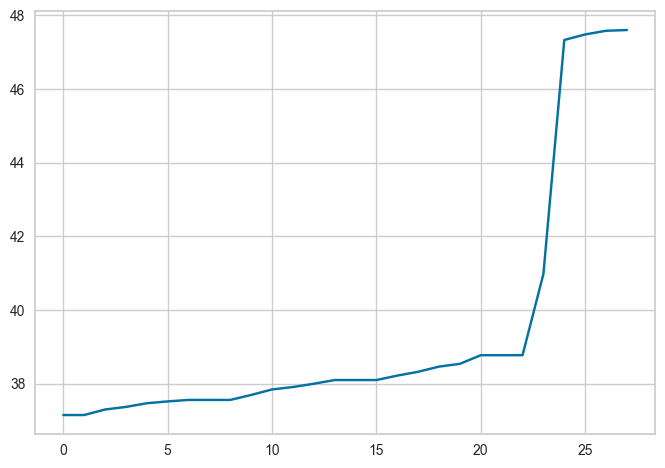

In [59]:
t = pickle.loads(zipf.read('train_X/'+train_y.filename[1130]))['t'].astype('timedelta64[s]').astype(int)
v = pickle.loads(zipf.read('train_X/'+train_y.filename[1130]))['v']
# plt.plot(v)
# plt.show()

In [64]:
import numpy as np
import tsfel
import json
from scipy.interpolate import interp1d

In [65]:
with open("../data_prep/tsfel_freq_config.json", "r") as f:
    tsfel_freq_cfg = json.load(f)

In [93]:
# interpolate values
dt = 4838397.067/85922
ts1 = np.linspace(t.min(), t.max(), num=len(v))
ts2 = np.arange(t.min(), t.max(), dt)

interpolator = interp1d(t, v, kind='nearest')
values_fixed = interpolator(ts1)
values_forfreq = interpolator(ts2)

# statistical and temporal domain
cfg1 = tsfel.get_features_by_domain(domain=['statistical', 'temporal'])
features_df_1 = tsfel.time_series_features_extractor(
    cfg1, v,
    fs=1/((ts1[1]-ts1[0])/3600),
    verbose=False
)

# frequency domain
cfg2 = tsfel_freq_cfg
features_df_2 = tsfel.time_series_features_extractor(
    cfg2, values_fixed,
    fs=1/((ts1[1]-ts1[0])/3600),
    verbose=False
)

In [85]:
1/((ts1[1]-ts1[0])/3600)

0.04173106646058732

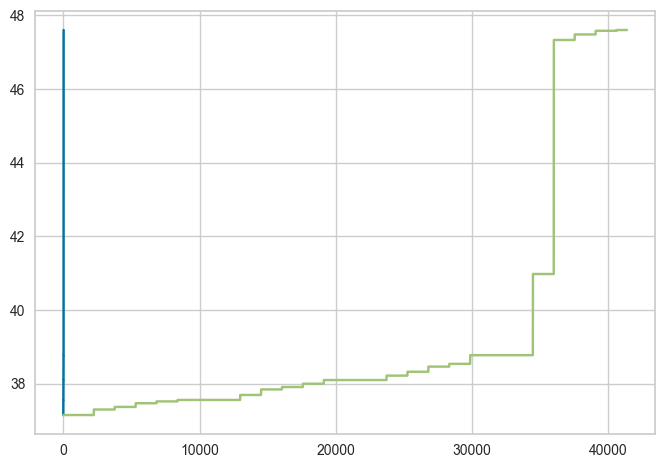

In [82]:
plt.plot(values_fixed)
plt.plot(values_forfreq)

In [78]:
features_df_2

,0_Fundamental frequency,0_Human range energy,0_Max power spectrum,0_Maximum frequency,0_Median frequency,0_Power bandwidth,0_Spectral centroid,0_Spectral decrease,0_Spectral distance,0_Spectral entropy,...,0_Wavelet standard deviation_7.99Hz,0_Wavelet variance_1.78Hz,0_Wavelet variance_15.98Hz,0_Wavelet variance_2.0Hz,0_Wavelet variance_2.28Hz,0_Wavelet variance_2.66Hz,0_Wavelet variance_3.2Hz,0_Wavelet variance_4.0Hz,0_Wavelet variance_5.33Hz,0_Wavelet variance_7.99Hz
0,2.283218,0.996316,0.04488,11.416089,0.0,9.132871,1.50654,-18.68109,-8830.609954,0.62846,...,12.702539,698.13292,40.862081,396.128646,222.071115,205.66299,278.067543,309.130113,262.863831,161.354495
